# Prática - Métricas para Análise de Resultados

Já conhecemos, em aulas anteriores, maneiras de gerar modelos de predição. Devemos agora entender como podemos selecionar o melhor modelo dentro de um conjunto de opções usando métricas adequadas. Isso aumenta o nosso conhecimento sobre avaliação de classificadores.

Vamos usar o banco de dados **mtcars** e usaremos um problema de tentar definir o valor da coluna **vs** tendo como fonte de informação a coluna **hp**.

Esse exemplo de brinquedo nos ajudará a entender as métricas. Criaremos classificadores de maneira arbitrária, mas o que aprenderemos vale também para classificadores treinados usando algoritmos de aprendizado de máquina.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mtcars = pd.read_csv("mtcars.csv", index_col = 0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Uma coisa que podemos observar é que um valor de **vs** igual a zero tende a ter valores maiores de **hp**. Entretanto, é possível encontrar alguns carros em que isso não é totalmente verdade. Um gráfico vai nos ajudar a visualizar melhor esse conceito.

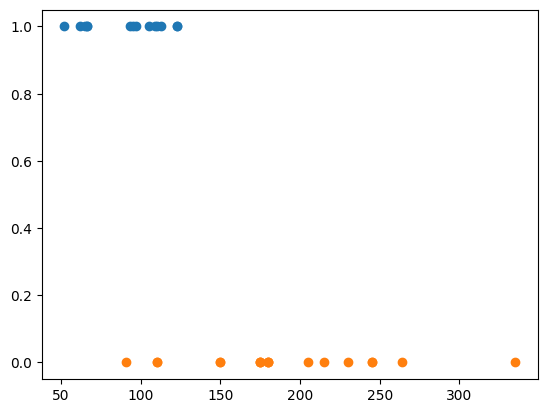

In [ ]:
plt.scatter(mtcars.hp[mtcars.vs == 1], np.ones(14))
plt.scatter(mtcars.hp[mtcars.vs == 0], np.zeros(18))

O gráfico nos mostra que existe um grupo de elementos em laranja misturados com os elementos em azul. Isso pode dificultar a escolha de um separador, por exemplo.

No momento, não vamos treinar realmente um classificador, escolheremos um limiar em algum ponto do eixo X e usaremos esse limiar como classificador. O que estamos fazendo é, na verdade, uma simplificação do que um classificador de regressão logística iria fazer.

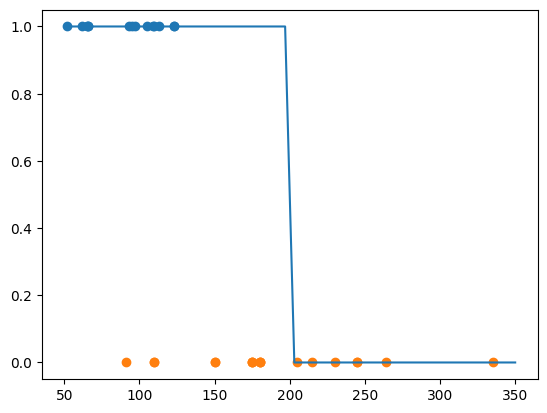

In [ ]:
def classificador1(hp) :
  return (hp < 200).astype(int)

## Plotando o classificador
x = np.linspace(50, 350)
plt.plot(x, classificador1(x))

plt.scatter(mtcars.hp[mtcars.vs == 1], np.ones(14))
plt.scatter(mtcars.hp[mtcars.vs == 0], np.zeros(18))

Podemos agora imaginar outros classificadores como limiares no eixo $X$. Esses limiares são computados arbitrariamente nos exemplos que seguem. Entretanto, lembre que algoritmos de aprendizado de máquina são capazes de computar o limiar sem muitos problemas.

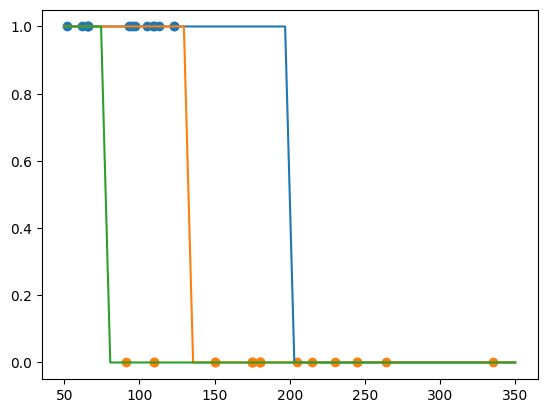

In [ ]:
def classificador2(hp) :
  return (hp < 130).astype(int)

def classificador3(hp) :
  return (hp < 80).astype(int)

plt.plot(x, classificador1(x))
plt.plot(x, classificador2(x))
plt.plot(x, classificador3(x))

plt.scatter(mtcars.hp[mtcars.vs == 1], np.ones(14))
plt.scatter(mtcars.hp[mtcars.vs == 0], np.zeros(18))

Agora temos três classificadores, em que cada um desses classificadores erra em alguma instância e acerta em outras. Quais são as métricas que permitem escolher qual é o melhor dentre esses classificadores? Podemos iniciar a análise comparando os classificadores com o resultado correto para saber onde os erros estão ocorrendo.

In [ ]:
## Verificando os resultados no formato de array
pd.DataFrame({
    "c1" : classificador1(mtcars.hp) == mtcars.vs,
    "c2" : classificador2(mtcars.hp) == mtcars.vs,
    "c3" : classificador3(mtcars.hp) == mtcars.vs
    }
)

,c1,c2,c3
model,,,
Mazda RX4,False,False,True
Mazda RX4 Wag,False,False,True
Datsun 710,True,True,False
Hornet 4 Drive,True,True,False
Hornet Sportabout,False,True,True
Valiant,True,True,False
Duster 360,True,True,True
Merc 240D,True,True,True
Merc 230,True,True,False


# Métricas

Vamos agora pesquisar um conjunto de métricas que nos permitirão entender os pontos fortes e fracos dos classificadores. As métricas já estão implementadas no sklearn, mas vamos criar o nosso próprio código para auxiliar no entendimento dos conceitos.

## Acurácia

Na acurácia, erros são erros, não importa se um **0** foi predito como **1** e nem se um **1** foi predito como **0**. Nesse caso, simplesmente dividimos a quantidade de acertos pelo número de instâncias.

In [ ]:
def accuracy(target, prediction) :
  return (target == prediction).sum()/len(target)

In [ ]:
accuracy(mtcars.vs, classificador1(mtcars.hp))

0.65625

In [ ]:
accuracy(mtcars.vs, classificador2(mtcars.hp))

0.90625

In [ ]:
accuracy(mtcars.vs, classificador3(mtcars.hp))

0.71875

## Matriz de Confusão

A matriz de confusão é uma ferramenta utilizada na análise de dados para avaliar a precisão de um modelo de classificação. Ela é representada por uma tabela que compara os resultados previstos pelo modelo com os resultados reais dos dados. A matriz é composta por quatro células, que representam as seguintes informações: verdadeiro positivo (VP), verdadeiro negativo (VN), falso positivo (FP) e falso negativo (FN).

O VP representa o número de casos em que o modelo previu corretamente uma classe positiva. O VN representa o número de casos em que o modelo previu corretamente uma classe negativa. O FP representa o número de casos em que o modelo previu uma classe positiva, mas o resultado real foi negativo. E o FN representa o número de casos em que o modelo previu uma classe negativa, mas o resultado real foi positivo.

A importância da matriz de confusão reside na possibilidade de avaliar o desempenho do modelo de classificação. A partir dos valores de VP, VN, FP e FN, é possível calcular várias métricas, como acurácia, precisão, recall e F1-score, que ajudam a entender a qualidade da previsão do modelo. Além disso, a matriz de confusão também ajuda a identificar os tipos de erros que o modelo está cometendo, o que pode ser útil para ajustá-lo e melhorar sua precisão.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

tn = 7, fp = 11, fn = 0, tp = 14


Text(50.722222222222214, 0.5, 'Predicted')

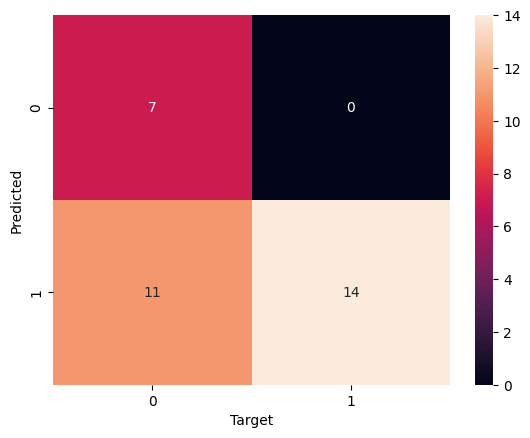

In [ ]:
matriz = confusion_matrix(mtcars.vs, classificador1(mtcars.hp))
tn, fp, fn, tp = matriz.ravel() ## ravel transforma a matriz 2x2 em uma tupla
print("tn = %i, fp = %i, fn = %i, tp = %i" % (tn, fp, fn, tp))
sns.heatmap(matriz.T, annot = True) ## A transporta reposiciona os dados no heatmap
plt.xlabel("Target")
plt.ylabel("Predicted")

tn = 15, fp = 3, fn = 0, tp = 14


Text(50.722222222222214, 0.5, 'Predicted')

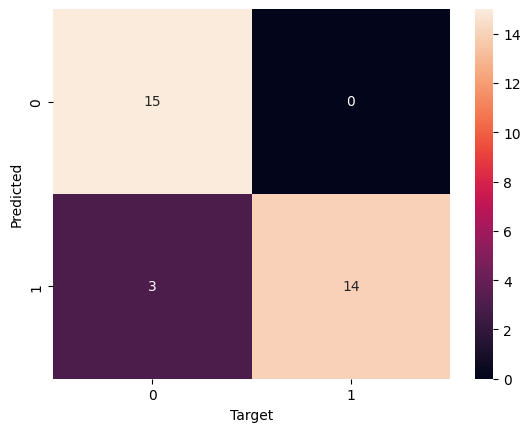

In [ ]:
matriz = confusion_matrix(mtcars.vs, classificador2(mtcars.hp))
tn, fp, fn, tp = matriz.ravel() ## ravel transforma a matriz 2x2 em uma tupla
print("tn = %i, fp = %i, fn = %i, tp = %i" % (tn, fp, fn, tp))
sns.heatmap(matriz.T, annot = True) ## A transporta reposiciona os dados no heatmap
plt.xlabel("Target")
plt.ylabel("Predicted")

tn = 18, fp = 0, fn = 9, tp = 5


Text(50.722222222222214, 0.5, 'Predicted')

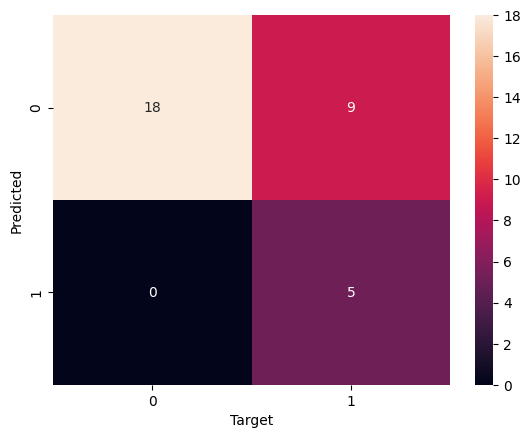

In [ ]:
matriz = confusion_matrix(mtcars.vs, classificador3(mtcars.hp))
tn, fp, fn, tp = matriz.ravel() ## ravel transforma a matriz 2x2 em uma tupla
print("tn = %i, fp = %i, fn = %i, tp = %i" % (tn, fp, fn, tp))
sns.heatmap(matriz.T, annot = True) ## A transporta reposiciona os dados no heatmap
plt.xlabel("Target")
plt.ylabel("Predicted")


## Revocação e Precisão

A revocação e precisão são duas medidas que ajudam a avaliar o quão bem um modelo consegue identificar se algo é verdadeiro ou falso.

A precisão é a métrica que mede a proporção de verdadeiros positivos em relação ao total de positivos previstos pelo modelo, indicando a acurácia das previsões positivas feitas.

A revocação é a métrica que mede a proporção de verdadeiros positivos corretamente identificados em relação ao total de verdadeiros positivos existentes, avaliando a capacidade do modelo de encontrar todas as instâncias relevantes.

Ambas as medidas são importantes para avaliar a eficácia de um modelo na identificação de verdadeiros positivos. Tanto a precisão quanto o recall (revocação) ignoram os verdadeiros negativos em seus cálculos. Elas se concentram apenas nas previsões positivas e nos verdadeiros positivos:


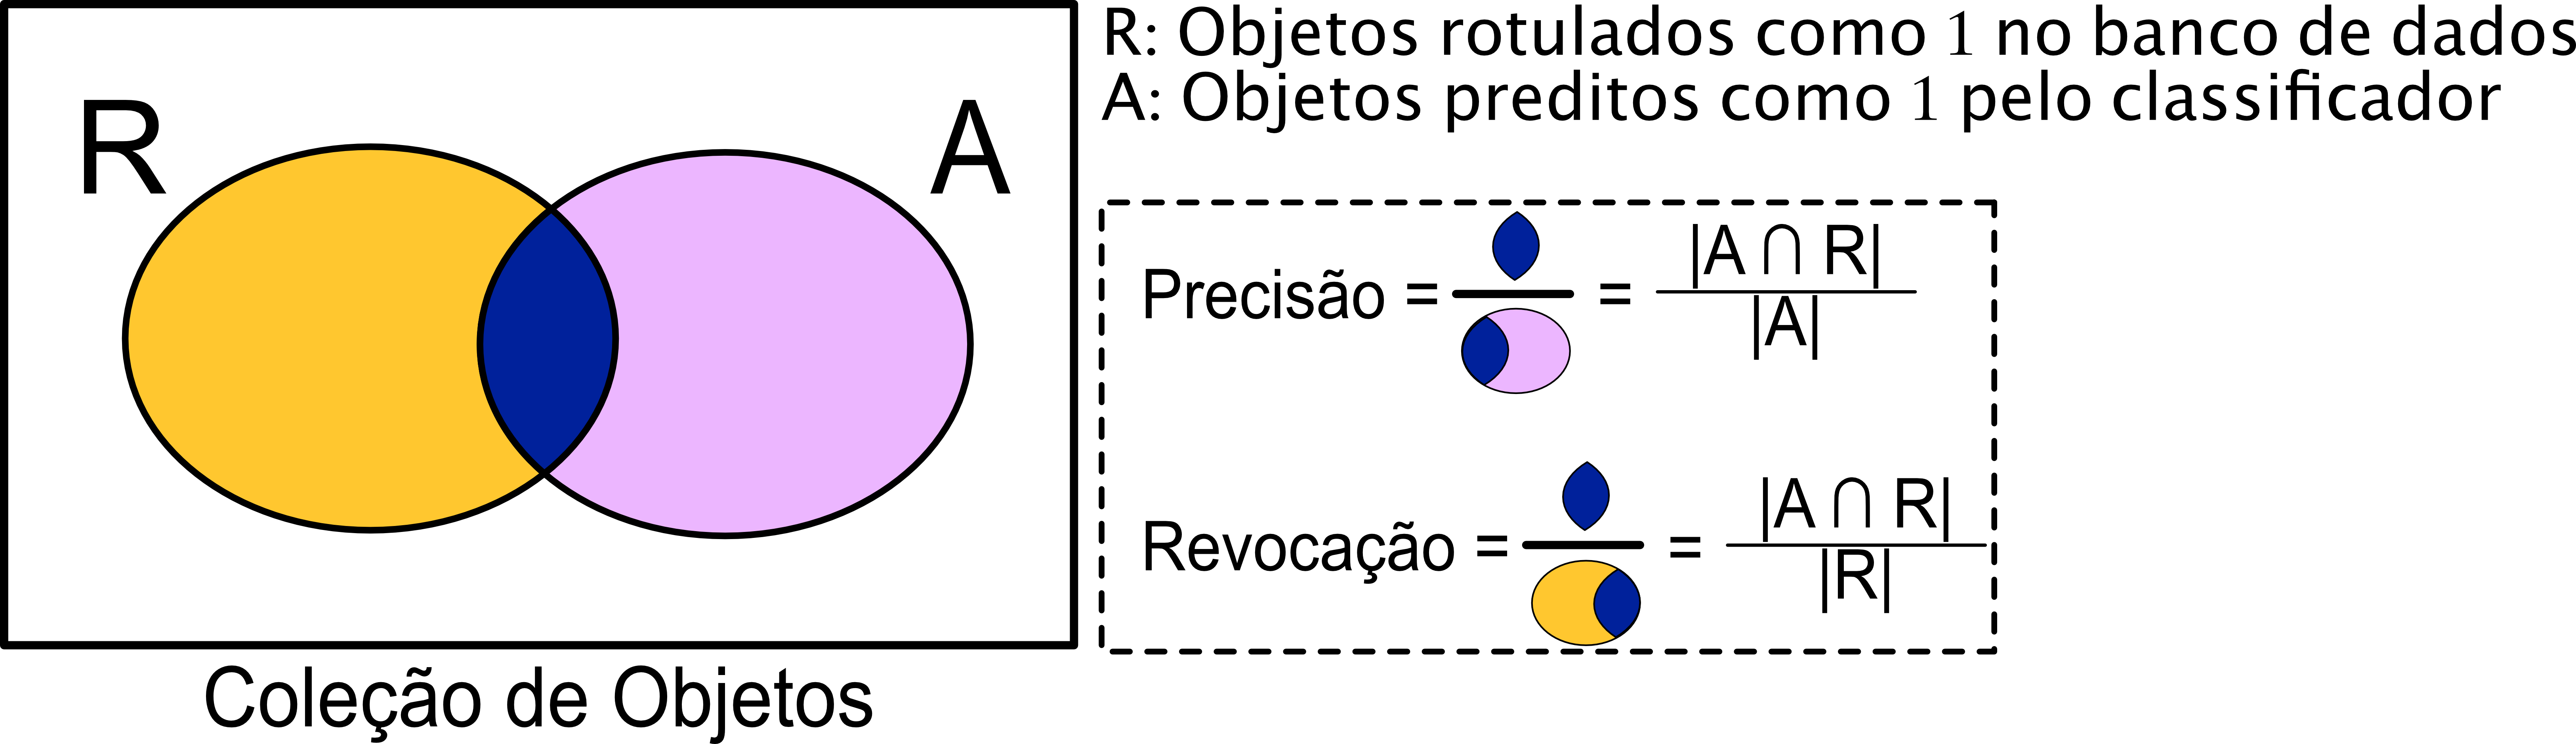

A forma acima de ver as métricas **revocação** e **precisão** é útil para saber o que elas significam e como se complementam. Entretanto, você precisa saber computar as métricas a partir de **tp**, **tn**, **fp** e **fn**.

## Precision (precisão)

Uma métrica que se preocupa apenas com os valores preditivos positivos. Quando estamos computando a precisão, nos importamos apenas com os valores cuja resposta foi dada como **1** pelo classificador.

* Fração de instâncias classificadas como **1** (relevantes) que são realmente **1** (relevantes).

De tudo aquilo que foi classificado como relevante, o quanto era realmente relevante?

In [ ]:
def precision(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fp)

In [ ]:
precision(mtcars.vs, classificador1(mtcars.hp))

0.56

In [ ]:
precision(mtcars.vs, classificador2(mtcars.hp))

0.8235294117647058

In [ ]:
precision(mtcars.vs, classificador3(mtcars.hp))

1.0

Existem cenários em que queremos classificadores com alta precisão e que não errem na classificação do **1**. Quando seria isso? Imagine um cenário em que um médico está usando o seu classificador para saber se um determinado paciente tem câncer. Ao receber o resultado do seu classificador e perceber que o número informado é **1**, o médico vai entender que ele tem câncer e vai imediatamente contactar o paciente para dar a notícia.

Nesse cenário, um classificador com baixa precisão seria desastroso, porque um paciente receberá uma comunicação que mudará toda a sua vida. Dizer que alguém está com câncer não é um evento que pode estar errado.

## Recall (Sensibilidade, Revocação)

O **recall** é uma segunda medida retirada da matriz de confusão. É uma medida que analisa se o nosso classificador consegue capturar os dados relevantes do nosso banco de dados. Em outras palavras, se os dados eram relevantes, eu quero identificá-los.

1. Fração de instâncias relevantes que foram recuperadas.
2. Queremos classificadores sensíveis, que realmente devolvam uma grande gama do que é relevante.
3. Os que eram 1 têm que ser retornados

In [ ]:
def recall(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fn)

In [ ]:
recall(mtcars.vs, classificador1(mtcars.hp))

1.0

In [ ]:
recall(mtcars.vs, classificador2(mtcars.hp))

1.0

In [ ]:
recall(mtcars.vs, classificador3(mtcars.hp))

0.35714285714285715

Existem cenários em que daremos mais importância para o **recall**. Mantendo a temática na área da saúde, vamos supor que estamos em uma pandemia e não queremos que um determinado vírus se espalhe. Nesse caso, queremos identificar pessoas que estão com vírus para aplicar uma quarentena.

O que importa neste cenário é identificar todas as pessoas com o vírus, não podemos deixar ninguém de fora (sob risco de se espalhar, não queremos um *outbreak*) e precisamos de um classificador sensível. Assim, não tem tanto problema se o classificador disse que uma determinada pessoa saudável tem o vírus, porque o pior que pode acontecer é essa pessoa ficar de quarentena sem necessidade.

Imagine que esse classificador pode ser apenas uma triagem e que testes posteriores (talvez mais onerosos) vão confirmar essa nossa primeira análise.

## Medida F

A **Medida F** é uma maneira de condensar o **Recall** e o **Precision** em um único número, o que pode facilitar a comparação de diferentes classificadores. Na sua forma mais comum, a **Medida F** é uma média harmônica entre os dois.

In [ ]:
def medida_f(target, prediction) :
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec+prec)

In [ ]:
medida_f(mtcars.vs, classificador1(mtcars.hp))

0.717948717948718

In [ ]:
medida_f(mtcars.vs, classificador2(mtcars.hp))

0.9032258064516129

In [ ]:
medida_f(mtcars.vs, classificador3(mtcars.hp))

0.5263157894736842

## Specificity (Especificidade)

Nas medidas anteriores, os **true negatives** foram completamente ignorados, note que ele não é considerado nem no **Recall** e nem no **Precision**. A medida de especificidade serve para completar a análise fazendo o tratamento desses dados.

1. Porcentagem das amostras negativas (zero) que foram realmente classificadas como negativas.

A medida de especifidade é muito semelhante ao recall. Note que é uma medida que pretende estabelecer o quanto de uma determinada situação presente no banco de dados foi realmente capturada pelo classificador. Ela é muito útil quando os valores negativos (**0**) no banco de dados são mais importantes para a nossa análise de um problema do que os valores positivos (**1**).

Em resumo, a especifidade está para os valores negativos assim como o recall está para os valores positivos.

In [ ]:
def specificity(target, prediction) :
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn+fp)

In [ ]:
specificity(mtcars.vs, classificador1(mtcars.hp))

0.3888888888888889

In [ ]:
specificity(mtcars.vs, classificador2(mtcars.hp))

0.8333333333333334

In [ ]:
specificity(mtcars.vs, classificador3(mtcars.hp))

1.0

## Todas as métricas

Vamos criar uma função que gera todas as medidas invocando as funções anteriores:

In [ ]:
def all_measures(target, predicted) :
  acc  = accuracy(target, predicted)
  prec = precision(target, predicted)
  rec  = recall(target, predicted)
  f_me = medida_f(target, predicted)
  spec = specificity(target, predicted)
  return acc, prec, rec, f_me, spec

Nesse caso, podemos obter todas as medidas para um dado classificador de maneira mais cômoda e colocar todas elas em um DataFrame.

In [ ]:
pd.DataFrame(
  [all_measures(mtcars.vs, classificador1(mtcars.hp)),
   all_measures(mtcars.vs, classificador2(mtcars.hp)),
   all_measures(mtcars.vs, classificador3(mtcars.hp))],
   columns = ["accuracy", "precision", "recall", "f", "spec"],
   index = ["c1", "c2", "c3"]
)

,accuracy,precision,recall,f,spec
c1,0.65625,0.560000,1.000000,0.388889,0.717949
c2,0.90625,0.823529,1.000000,0.833333,0.903226
c3,0.71875,1.000000,0.357143,1.000000,0.526316


## Revocação e Precisão com várias classes

No exemplo acima, queríamos prever uma dentre duas classes disponíveis. Entretanto, como faríamos se tentássemos prever uma dentre três classes?

Nesse caso, a nossa matriz de confusão teria agora três elementos. Como então as noções de **recall** e **precision** podem ser calculadas nessa configuração?

A resposta é simples, teremos que gerar várias matrizes menores, dependendo de quantas classes temos no nosso problema.

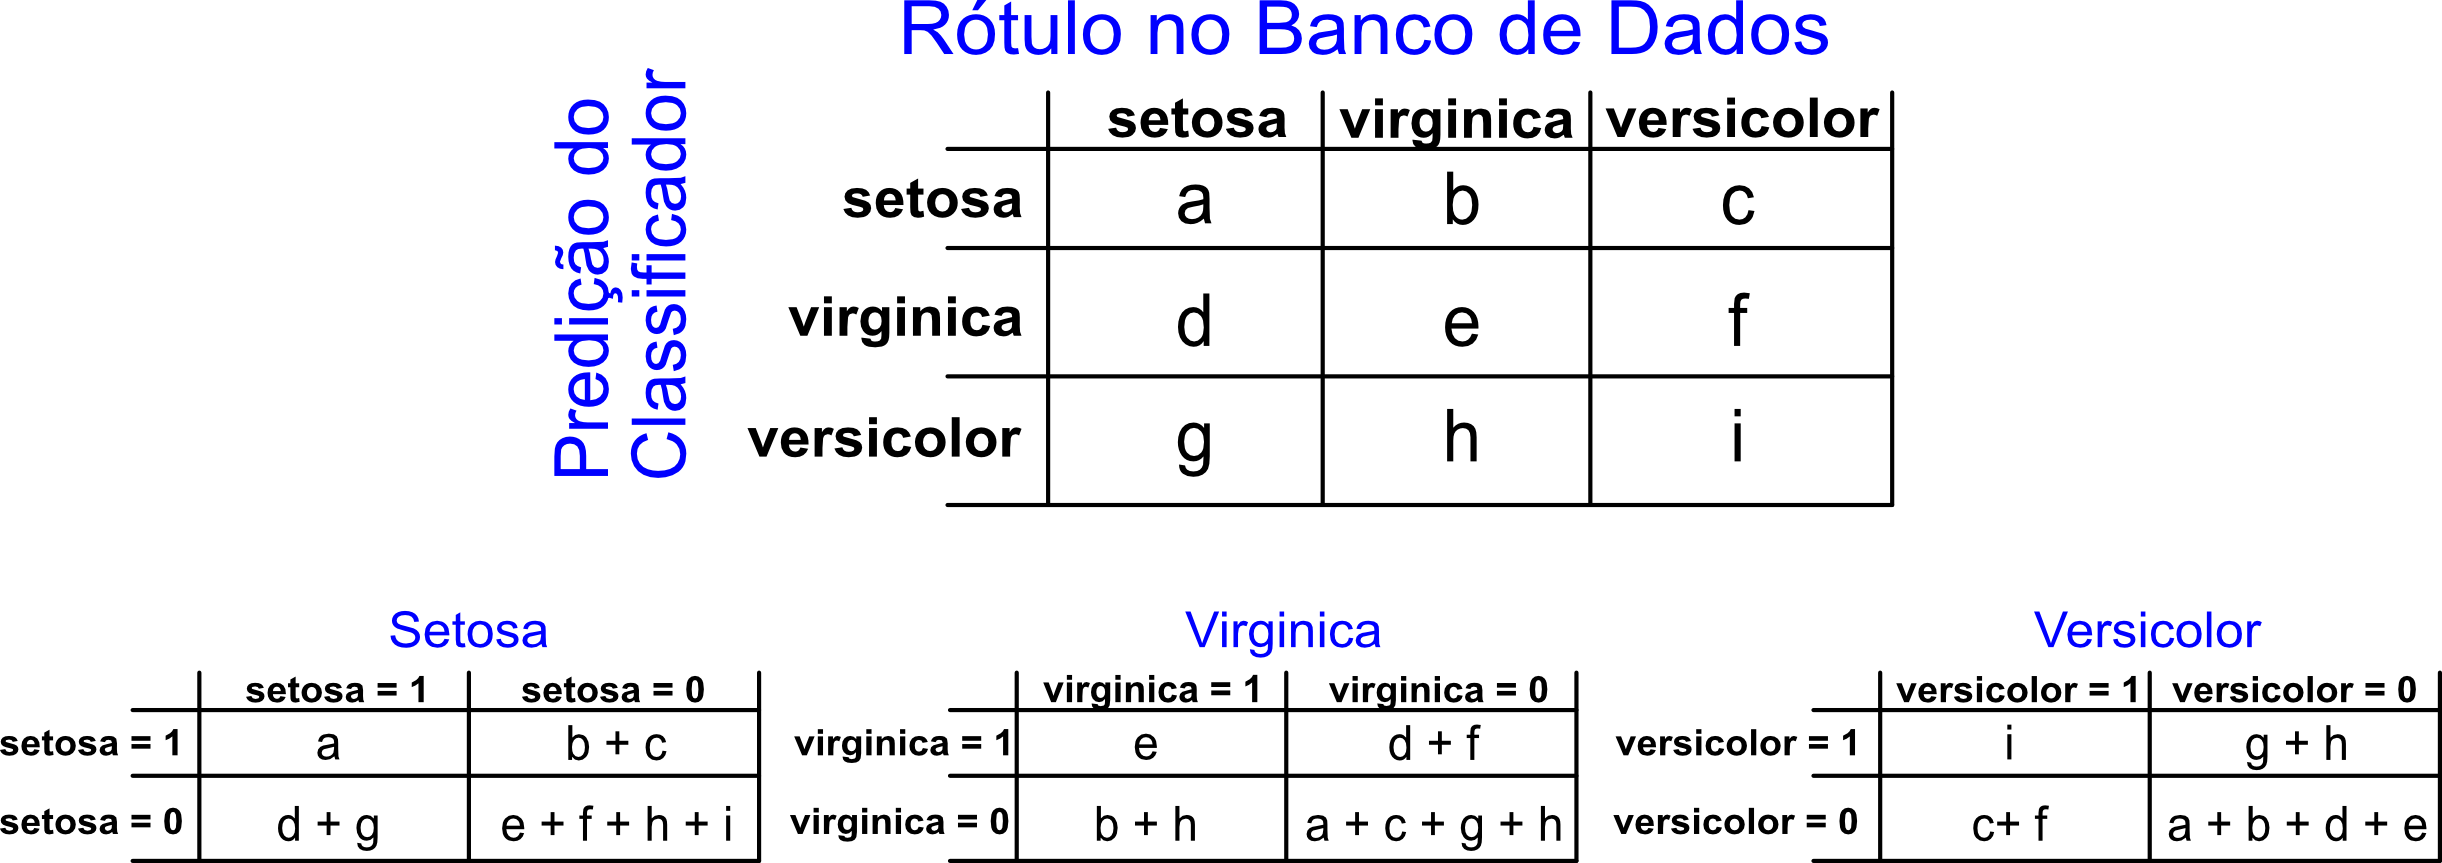

Com as matrizes acima, podemos gerar facilmente uma **precisão** específica para cada classe, assim como uma **revocação**, usando as fórmulas vistas anteriormente para problemas binários. Isso geraria três precisões e três revocações:

$ Precision_{setosa} = \frac{a}{a+b+c}$; $Recall_{setosa} = \frac{a}{a+d+g}$

$ Precision_{virginica} = \frac{e}{e+d+f}$; $Recall_{virginica} = \frac{e}{e+b+h}$

$ Precision_{versicolor} = \frac{i}{i+g+h}$; $Recall_{versicolor} = \frac{i}{i+c+f}$

A **Macro-Precisão** e a **Macro-Revocação** são maneiras de se obter valores únicos que caracterizem o problema como o um todo. Elas são valores médios das precisões e revocações individuais.

$Precision-Macro = \frac{Precision_{setosa}+ Precision_{virginica} + Precision_{versicolor}}{3}$

$Recall-Macro = \frac{Recall_{setosa}+ Recall_{virginica} + Recall_{versicolor}}{3}$

A **Micro-Precisão** e a **Micro-Revocação** são duas outras maneiras de se gerar um valor de precisão e revocação para o problema como um todo. Ela é criada somando todos os valores de **tp**, **fp** e **tn**.

$Precision-Micro = \frac{a+e+i}{(a+b+c)+(e+d+f)+(i+g+h)}$

$Recall-Micro = \frac{a+e+i}{(a+d+g)+(e+b+h)+(i+c+f)}$

Essa discussão nos leva a concluir com as seguintes observações.

* A micro-precisão e a micro-revocação são sempre iguais em problemas multiclasse.
* A micro-precisão e a macro-precisão só mudam no caso de classes muito desbalanceadas.
* A micro-revocação e a macro-revocação só mudam no caso de classes muito desbalanceadas.


### Exemplo de Multiclasse

Vamos supor agora que, ao invés de predizer a coluna **vs**, queremos computar valores da coluna **cyl** com a coluna **hp**.

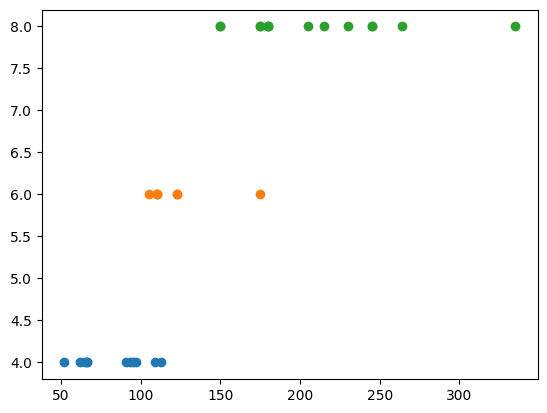

In [ ]:
plt.scatter(mtcars.hp[mtcars.cyl == 4], 4*np.ones(11))
plt.scatter(mtcars.hp[mtcars.cyl == 6], 6*np.ones(7))
plt.scatter(mtcars.hp[mtcars.cyl == 8], 8*np.ones(14))

O nosso classificador deverá retornar um valor dentre essas classes.

In [ ]:
def classificador_multiclasse(value) :
  v1 = (value > 110).astype(int)
  v2 = (value > 180).astype(int)
  return (2+v1+v2)*2

Vamos verificar as respostas do classificador em conjunto com os pontos.

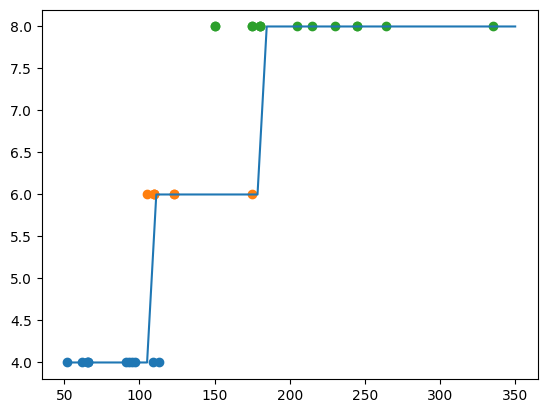

In [ ]:
## Plotando o classificador
x = np.linspace(50, 350)
plt.plot(x, classificador_multiclasse(x))

plt.scatter(mtcars.hp[mtcars.cyl == 4], 4*np.ones(11))
plt.scatter(mtcars.hp[mtcars.cyl == 6], 6*np.ones(7))
plt.scatter(mtcars.hp[mtcars.cyl == 8], 8*np.ones(14))

Gerando a matriz de confusão, temos:

Text(50.722222222222214, 0.5, 'Predicted')

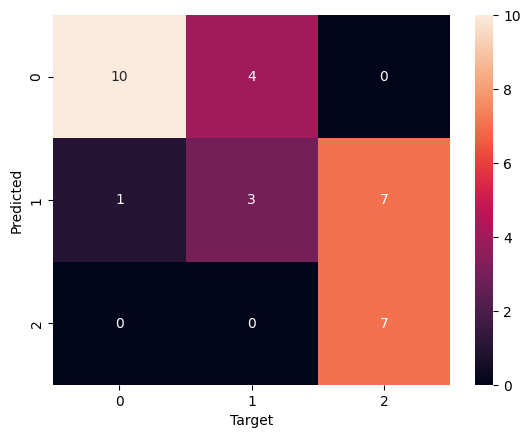

In [ ]:
matriz = confusion_matrix(mtcars.cyl, classificador_multiclasse(mtcars.hp))
sns.heatmap(matriz.T, annot = True) ## A transporta reposiciona os dados no heatmap
plt.xlabel("Target")
plt.ylabel("Predicted")

Não vamos implementar as fórmulas de precision e recall aqui, mas utilizaremos as que já existem no scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
accuracy_score(mtcars.cyl, classificador_multiclasse(mtcars.hp))

0.625

In [ ]:
recall_score(mtcars.cyl, classificador_multiclasse(mtcars.hp), average = "micro")

0.625

In [ ]:
recall_score(mtcars.cyl, classificador_multiclasse(mtcars.hp), average = "macro")

0.6125541125541125

In [ ]:
precision_score(mtcars.cyl, classificador_multiclasse(mtcars.hp), average = "micro")

0.625

In [ ]:
precision_score(mtcars.cyl, classificador_multiclasse(mtcars.hp), average = "macro")

0.6623376623376623